# Notebook showing some very basic QA on main survey reduced data so far

In [ ]:
from astropy.table import Table
import fitsio
import numpy as np
from matplotlib import pyplot as plt
import os,sys

In [2]:
from desitarget import targetmask

In [3]:
ff = fitsio.read('/global/cfs/cdirs/desi/spectro/redux/everest/zcatalog/ztile-main-dark-cumulative.fits')

In [7]:
wp = ff['PRIORITY'] == 3400
print(len(ff[wp]))
wq = ff['DESI_TARGET'] & 2**2 != 0
print(len(ff[wq]),len(ff[wq&wp]))
ws = ff['DESI_TARGET'] & 2**62 != 0
print(len(ff[wp&ws&~wq]))

508522
440110 439007
69515


In [6]:
np.unique(ff['PRIORITY'],return_counts=True)

(array([  -1,    0,    2,   50,   60,   70,   80,   90,  100, 1000, 1005,
        1010, 1025, 1450, 1550, 1700, 1950, 1980, 1998, 2998, 3000, 3100,
        3200, 3350, 3400, 4000], dtype=int32),
 array([ 21572, 269766,    123,      5,   1156,   1377,    149,    867,
           102,      6,     36,    110,    137,    103,     83,    253,
            24,    197,      2,   1058,   9576, 203878, 478162,   1048,
        508522,    188]))

In [17]:
w = ff['PRIORITY'] == 0
print(np.unique(ff[w]['OBJTYPE'],return_counts=True))

(array(['', 'BAD', 'SKY', 'TGT'], dtype='<U3'), array([ 78350,   1045, 161578,  28793]))


In [16]:
ff.dtype.names

('TARGETID',
 'CHI2',
 'COEFF',
 'Z',
 'ZERR',
 'ZWARN',
 'NPIXELS',
 'SPECTYPE',
 'SUBTYPE',
 'NCOEFF',
 'DELTACHI2',
 'PETAL_LOC',
 'DEVICE_LOC',
 'LOCATION',
 'FIBER',
 'COADD_FIBERSTATUS',
 'TARGET_RA',
 'TARGET_DEC',
 'PMRA',
 'PMDEC',
 'REF_EPOCH',
 'LAMBDA_REF',
 'FA_TARGET',
 'FA_TYPE',
 'OBJTYPE',
 'FIBERASSIGN_X',
 'FIBERASSIGN_Y',
 'PRIORITY',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'RELEASE',
 'BRICKID',
 'BRICK_OBJID',
 'MORPHTYPE',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'MASKBITS',
 'REF_ID',
 'REF_CAT',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'PARALLAX',
 'BRICKNAME',
 'EBV',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'SERSIC',
 'SHAPE_R',
 'SHAPE_E1',
 'SHAPE_E2',
 'PHOTSYS',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'DESI_TARGET',
 'BGS_TARGET',
 'MWS_TARGET',
 'SCND_TARGET',
 'PLAT

In [17]:
sys.path.append('../py') #this works if you are in the LSS/Sandbox directory, check with os.getcwd()

In [20]:
from LSS.main import cattools as ct

In [22]:
import importlib

In [23]:
importlib.reload(ct)

<module 'LSS.main.cattools' from '../py/LSS/main/cattools.py'>

In [106]:
mt = Table.read('/global/cfs/cdirs/desi/survey/ops/surveyops/trunk/ops/tiles-main.ecsv')

In [3]:
mt.columns

<TableColumns names=('TILEID','PASS','RA','DEC','PROGRAM','IN_DESI','PRIORITY','STATUS','EBV_MED','DESIGNHA','DONEFRAC','AVAILABLE','PRIORITY_BOOSTFAC')>

In [4]:
len(mt)

20298

In [107]:
wd = mt['DONEFRAC'] > 1
print(len(mt[wd]))

134


In [124]:
#use this to test a specific tile
tdir = '/global/cfs/cdirs/desi/spectro/redux/daily/tiles/cumulative/1895'
subsets = [x[0][len(tdir):].strip('/') for x in os.walk(tdir)]

In [101]:
zt = ct.combspecdata('1895',max(subsets),md='') #zt becomes table with redshift info

spectrographs with data:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000


In [102]:
wt = zt['FIBERSTATUS'] == 0
np.median(zt[wt]['TSNR2_QSO'])

31.8801

In [104]:
#look at number of quasars
wq = zt['SPECTYPE'] == 'QSO'
wq &= zt['FIBERSTATUS'] == 0
wq &= zt['ZWARN'] == 0
wq &= zt['DESI_TARGET'] & targetmask.desi_mask['QSO'] > 0
print(len(zt[wq]))

759


### below goes through all tiles with donefrac > 1 and compares "good" to total

In [33]:
tps = ['LRG','ELG','QSO','BGS_ANY','MWS_ANY']

In [114]:
elgt = []
elgg = []
lrgt = []
lrgg = []
qsot  = []
qsog = []
bgst = []
bgsg = []
mwst = []
mwsg = []
bt = []
n = 0
for tid,pr in zip(mt[wd]['TILEID'],mt[wd]['PROGRAM']):
    n += 1
    tdir = '/global/cfs/cdirs/desi/spectro/redux/daily/tiles/cumulative/'+str(tid)
    subsets = [x[0][len(tdir):].strip('/') for x in os.walk(tdir)]
    zt = ct.combspecdata(str(tid),max(subsets),md='')
    print(n,len(mt[wd]))
    print('tile is '+str(tid)+' and program is '+pr)
    for tp in tps:
        selt = (zt['DESI_TARGET'] & targetmask.desi_mask[tp]) > 0
        selt &= (zt['FIBERSTATUS'] == 0)
        wzg = selt & (zt['ZWARN'] == 0)
        #print(tp,len(zt[selt]),len(zt[wzg]))
        if pr == 'DARK':
            if tp == 'ELG':
                selt &= (zt['DESI_TARGET'] & targetmask.desi_mask['QSO']) == 0
                wzg &= (zt['DESI_TARGET'] & targetmask.desi_mask['QSO']) == 0
                elgt.append(len(zt[selt]))
                elgg.append(len(zt[wzg]))
            if tp == 'LRG':
                lrgt.append(len(zt[selt]))
                lrgg.append(len(zt[wzg]))    
            if tp == 'QSO':
                qsot.append(len(zt[selt]))
                qsog.append(len(zt[wzg]))
                if len(zt[wzg])/len(zt[selt]) < 0.75:
                    bt.append(tid)
        if pr == 'BRIGHT':
            if tp == 'BGS_ANY':
                wzg &= (zt['DELTACHI2'] > 40)
                bgst.append(len(zt[selt]))
                bgsg.append(len(zt[wzg]))
            if tp == 'MWS_ANY':
                mwst.append(len(zt[selt]))
                mwsg.append(len(zt[wzg]))    
                

spectrographs with data:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
1 134
tile is 1000 and program is DARK
spectrographs with data:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
2 134
tile is 1080 and program is DARK
spectrographs with data:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
3 134
tile is 1081 and program is DARK
spectrographs with data:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
4 134
tile is 1090 and program is DARK
spectrographs with data:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
5 134
tile is 1098 and program is DARK
spectrographs with data:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
6 134
tile is 1106 and program is DARK
spectrographs with data:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
7 134
tile is 1130 and program is DARK
spectrographs with data:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
8 134
tile is 1240 and program is DARK
spectrographs with data:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
9 134
tile is 1241 and program is DARK
spectrographs with data:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

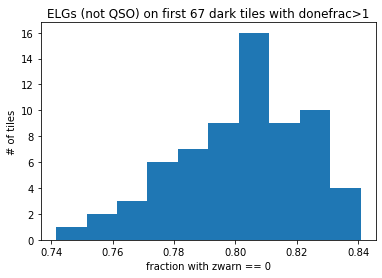

In [119]:
plt.hist(np.array(elgg)/np.array(elgt))
plt.xlabel('fraction with zwarn == 0')
plt.ylabel('# of tiles')
plt.title('ELGs (not QSO) on first '+str(len(elgg))+' dark tiles with donefrac>1')
plt.show()


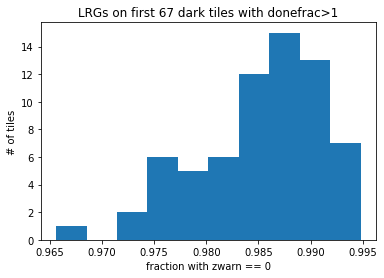

In [120]:
plt.hist(np.array(lrgg)/np.array(lrgt))
plt.xlabel('fraction with zwarn == 0')
plt.ylabel('# of tiles')
plt.title('LRGs on first '+str(len(elgg))+' dark tiles with donefrac>1')
plt.show()

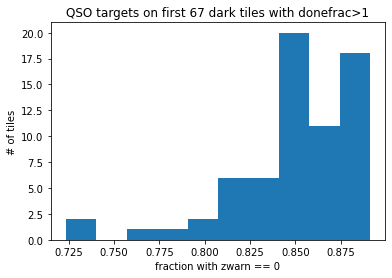

In [121]:
plt.hist(np.array(qsog)/np.array(qsot))
plt.xlabel('fraction with zwarn == 0')
plt.ylabel('# of tiles')
plt.title('QSO targets on first '+str(len(elgg))+' dark tiles with donefrac>1')
plt.show()

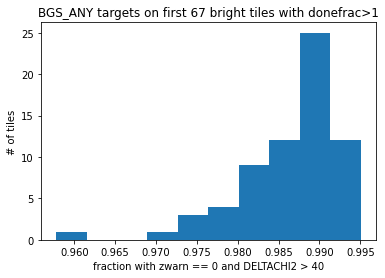

In [122]:
plt.hist(np.array(bgsg)/np.array(bgst))
plt.xlabel('fraction with zwarn == 0 and DELTACHI2 > 40')
plt.ylabel('# of tiles')
plt.title('BGS_ANY targets on first '+str(len(bgsg))+' bright tiles with donefrac>1')
plt.show()

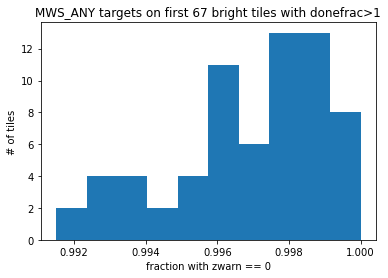

In [123]:
plt.hist(np.array(mwsg)/np.array(mwst))
plt.xlabel('fraction with zwarn == 0')
plt.ylabel('# of tiles')
plt.title('MWS_ANY targets on first '+str(len(elgg))+' bright tiles with donefrac>1')
plt.show()

In [111]:
print(sum(elgg),sum(lrgg),sum(qsog),len(elgg))

62241 74387 81573 67


In [112]:
print(sum(elgt),sum(lrgt),sum(qsot))

77503 75497 96155


In [115]:
print(sum(bgsg),sum(mwsg),len(bgsg))

215199 44852 67


In [116]:
print(sum(bgst),sum(mwst),len(bgst))

218165 44991 67


In [66]:
wb = np.isin(mt['TILEID'],bt)

In [67]:
mt[wb]

TILEID,PASS,RA,DEC,PROGRAM,IN_DESI,PRIORITY,STATUS,EBV_MED,DESIGNHA,DONEFRAC,AVAILABLE,PRIORITY_BOOSTFAC
int64,int32,float64,float64,str6,bool,float64,str8,float32,float32,float32,bool,float64
1080,0,218.757,-5.404,DARK,True,1.420e+00,obsend,0.068,6.36,1.1620,True,1.000
1081,0,215.439,-4.940,DARK,True,1.418e+00,obsend,0.047,5.64,1.1242,True,1.000
1106,0,227.645,-3.689,DARK,True,1.412e+00,obsend,0.125,10.22,1.1710,True,1.000


In [74]:
sum(qsot)/66

1435.3181818181818